### Librairies import

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Loading data

In [2]:
cwd = os.getcwd()
data_wd = cwd.replace('Code', 'Datasets')
train_path = data_wd + '\\train.csv'
test_path = data_wd + '\\test.csv'

In [6]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [7]:
X_train = train.drop('Cover_Type', axis=1)
y_train = train['Cover_Type']
X_test = test

### Data cleaning

In [14]:
len(train)

15120

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

We have no missing values in our dataframe, all data is in int64. Thus, no need to clean the dataset

### Exploratory Data Analysis

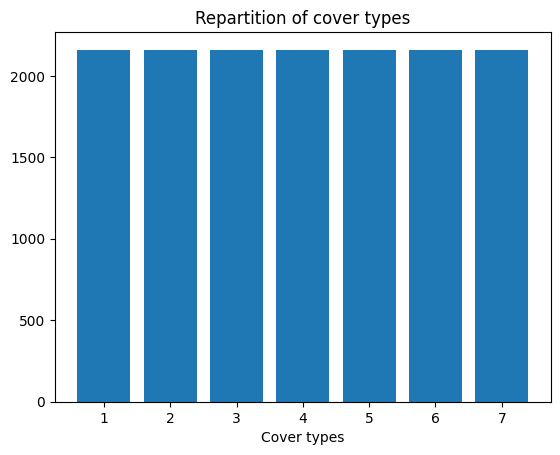

In [46]:
types_count = train[['Id', 'Cover_Type']].groupby(['Cover_Type']).count().reset_index()
plt.bar(types_count['Cover_Type'], types_count['Id'])
plt.xlabel('Cover types')
plt.title('Repartition of cover types');

We see the the different cover types are equally distributed in the dataset

Now, let's see if there are some obvious correlations within the data

In [11]:
train.corrwith(train["Cover_Type"], numeric_only=True).sort_values()

Wilderness_Area1                     -0.229981
Soil_Type29                          -0.221978
Soil_Type22                          -0.185038
Soil_Type23                          -0.155529
Soil_Type12                          -0.138125
Soil_Type32                          -0.120156
Horizontal_Distance_To_Roadways      -0.119576
Horizontal_Distance_To_Fire_Points   -0.099413
Soil_Type24                          -0.095006
Hillshade_Noon                       -0.093008
Soil_Type31                          -0.084343
Soil_Type33                          -0.080941
Soil_Type19                          -0.049798
Hillshade_3pm                        -0.047372
Soil_Type20                          -0.035903
Soil_Type21                          -0.029585
Soil_Type4                           -0.027012
Wilderness_Area2                     -0.024327
Soil_Type25                          -0.023245
Soil_Type27                          -0.021570
Soil_Type3                           -0.019240
Soil_Type9   

We notice that the wildness area has the strongest correlation with the cover type. We'll tey to see graphically this correlation

In [22]:
np.unique(train['Wilderness_Area1']), np.unique(train['Cover_Type'])

(array([0, 1], dtype=int64), array([1, 2, 3, 4, 5, 6, 7], dtype=int64))

In [70]:
hist_data = train[['Wilderness_Area1', 'Cover_Type']]
hist_data = hist_data.groupby(['Cover_Type']).sum().reset_index()
hist_data['Wilderness_Area0'] = 2160 - hist_data['Wilderness_Area1']

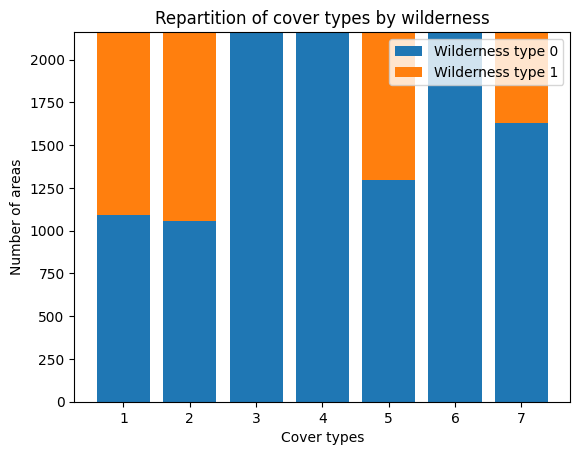

In [76]:
plt.bar(hist_data['Cover_Type'], hist_data['Wilderness_Area0'], label='Wilderness type 0')
plt.bar(hist_data['Cover_Type'], hist_data['Wilderness_Area1'], 
        bottom=hist_data['Wilderness_Area0'], label = 'Wilderness type 1')
plt.xlabel('Cover types')
plt.ylabel('Number of areas')
plt.title('Repartition of cover types by wilderness type 1')
plt.legend();

We notice that for the Cover types 3, 4 and 6, they can't be in wilderness 1

In [ ]:
df = train[(train["Cover_Type"] in (3, 4, 5))&
                   (train[''])&
                   (data["date"] < pd.to_datetime("2021/01/23"))]